In [2]:
n = 0

with open('pp-complete.csv') as file:
        for i in file:
            n += 1
print(n)

24020161


In [7]:
import pandas as pd

file_path = 'pp-complete.csv'

length = 24020161

file = pd.read_csv('pp-complete.csv', header=None, iterator=True,
                   chunksize=3000000, usecols=[1,2,3,4,5,6], parse_dates=[1,], infer_datetime_format=True,
                   names=('Price', 'Date', 'PC', 'Type', 'Newold', 'Freehold')
                   )

n = 0 
sum = []
number = []
max = []
min = []
daf = pd.DataFrame()
list = []
for chunk in file:
    print(chunk.head(1))
    gb = chunk.groupby(chunk.Date.dt.year)
    sum.append(gb.sum())
    number.append(gb.count())
    max.append(gb.max())
    min.append(gb.min())
#   daf = pd.DataFrame()
#list.append(daf[['Price_sum', 'Price_count', 'Price_max', 'Price_min']].groupby(chunk.Date.dt.year).agg(['sum', 'count', 'max', 'min']))
    
# df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
    
    
#     n = n + 1
#     if n == 4:
#        break
df = pd.DataFrame()

df['Price_sum'] = pd.concat(sum)['Price']
df['Price_count'] = pd.concat(number)['Price']
df['Price_max'] = pd.concat(max)['Price']
df['Price_min'] = pd.concat(min)['Price']

print(df, '\n')

gb = df.groupby(df.index)

df2 = pd.DataFrame()

df2['Price_sum'] = gb.sum()['Price_sum']
df2['Price_count'] = gb.sum()['Price_count']
df2['Price_max'] = gb.max()['Price_max']
df2['Price_min'] = gb.min()['Price_min']

print(df2)
df2.to_csv('reduced.csv')

    Price       Date        PC Type Newold Freehold
0  122000 1995-09-29  NG14 5DE    D      N        F
         Price       Date        PC Type Newold Freehold
1000000  92500 1996-08-22  RH15 9RG    D      Y        F
          Price       Date       PC Type Newold Freehold
2000000  355000 1997-12-19  W14 8LG    T      N        F
         Price       Date        PC Type Newold Freehold
3000000  35000 1998-09-30  BD22 6NR    T      N        F
         Price       Date        PC Type Newold Freehold
4000000  91000 1999-10-08  SA11 3SU    D      Y        F
         Price       Date        PC Type Newold Freehold
5000000  60000 1999-06-25  LE12 7FT    S      N        F
         Price       Date       PC Type Newold Freehold
6000000  59500 2000-07-28  BB5 3AT    S      N        L
          Price       Date       PC Type Newold Freehold
7000000  142000 2001-10-09  S18 8QY    D      N        F
         Price       Date        PC Type Newold Freehold
8000000  86000 2002-10-09  NG19 9EY    S   

         Price_sum  Price_count     Price_mean
Date                                          
1995   54098850504       796484   67922.080675
1996   68957690655       964526   71493.863986
1997   85863859330      1093545   78518.816628
1998   89663039949      1049613   85424.856541
1999  114633233618      1193913   96014.729397
2000  121260878543      1128441  107458.767045
2001  147979034072      1244900  118868.209553
2002  186314671281      1350821  137926.987573
2003  192433361866      1234574  155870.253112
2004  220189607554      1231039  178864.851198
2005  200812058382      1060678  189324.242024
2006  269690261679      1325197  203509.562487
2007  278924310914      1271538  219359.791775
2008  140886406508       649233  217004.382876
2009  133362353730       624898  213414.595230
2010  156486826256       662908  236061.152160
2011  153819460868       660795  232779.395831
2012  159290080367       668408  238312.647914
2013  208120862710       810330  256834.700320
2014  2752027

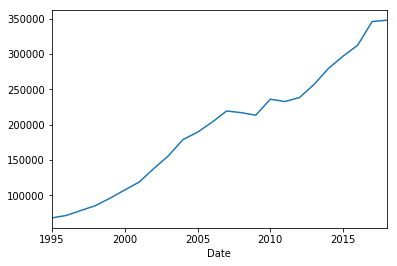

In [9]:
df3 = pd.DataFrame()
df3['Price_sum'] = df2['Price_sum']
df3['Price_count'] = df2['Price_count']

df3['Price_mean'] = df3['Price_sum'] / df3['Price_count']

df3['Price_mean'].plot()
print(df3)